In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./data/train.csv')

In [7]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
238116,238116,9687,349411,What are the different types of pit bulls?,Are all-white pit bulls rare?,0
309448,309448,332633,61660,Can men use honey as a face mask?,How many times should I use face mask?,0
274206,274206,392797,392798,Fresher How much salary does a graphic designe...,How much salary does a graphic designer in Ind...,0
59239,59239,103792,103793,Where did the stereotype that Asians are smart...,Where does the stereotype of Asians all being ...,0
311567,311567,435851,435852,When did you have your first kiss and who was ...,Where did you have your first kiss?,0
153662,153662,241151,105234,Where can I find Borax in India?,If India is so good why do Indians leave India?,0
4801,4801,9479,9480,Is Stevie Wonder married?,Is Elizabeth Holmes married?,0
197421,197421,298379,298380,What do you think about Shobhaa De's Twitter c...,I have a offer for a Technical Product Manager...,0
403180,403180,500600,536751,How do I merge data from multiple data sources...,How should a circuit be designed to pull tens/...,0
65118,65118,24296,39651,How do I earn money online?,How can I earn money online from home only?,1


In [6]:
df.shape

(404290, 6)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [9]:
# check missing values
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [10]:
#check duplicate values for both the question
df.duplicated().sum()

0

is_duplicate
0    255027
1    149263
Name: count, dtype: int64
is_duplicate
0    63.080215
1    36.919785
Name: count, dtype: float64


<AxesSubplot: xlabel='is_duplicate'>

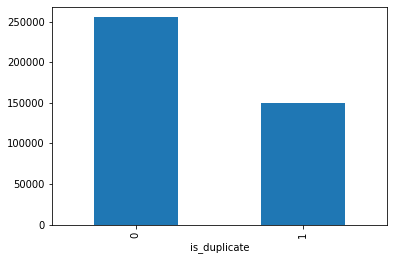

In [12]:
# Distribution of duplicate and non- duplicate question 

print(df['is_duplicate'].value_counts())
# in percentage 
print((df['is_duplicate'].value_counts() / df['is_duplicate'].count() ) *100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [22]:
# repeated  questions

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print(np.unique(qid).shape)
print('Number of unique questions' , np.unique(qid).shape[0])
x  = qid.value_counts()>1
#print(x)
print('Number of questions getting repeated', x[x].shape[0])


(537933,)
Number of unique questions 537933
Number of questions getting repeated 111780


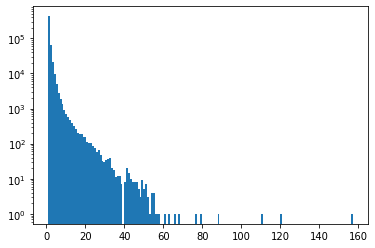

In [23]:
# Repeated questions histogram

plt.hist(qid.value_counts().values, bins=160)
plt.yscale('log')
plt.show()